In [40]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from typing import List, Tuple, Dict, Callable

# disable warnings
import warnings

warnings.filterwarnings("ignore")

In [12]:
# get current directory and files starting with 'ten-dim'
files = os.listdir()
files = [file for file in os.listdir() if file.startswith('ten-dim')]
labels: List[str] = [
            "social_support",
            "conflict",
            "trust",
            "neutral",
            "fun",
            "respect",
            "knowledge",
            "power",
            "similarity_identity",
        ]

In [13]:
# Read first json file
with open(files[0]) as f:
    data = json.load(f)

In [20]:
files[0]

'ten-dim_balanced_gpt-4_augmented_similarity.json'

In [14]:
# Compute avg similarity for each base sample
similarities_avg_individual = {k: {} for k in labels}
for label, dict_with_similarities in data.items():
    for text in dict_with_similarities:
        list_similarities = [x[0] for x in dict_with_similarities[text]]
        similarities_avg_individual[label][text] = sum(list_similarities) / len(
            list_similarities
        )

# Compute avg similarity for each label
similarities_avg_label = {k: [] for k in labels}
similarities_list_label = {k: [] for k in labels}
for label, dict_with_similarities in similarities_avg_individual.items():
    for text, similarity in dict_with_similarities.items():
        similarities_avg_label[label].append(similarity)
        similarities_list_label[label].append(similarity)

    similarities_avg_label[label] = sum(similarities_avg_label[label]) / len(
        similarities_avg_label[label]
    )

In [15]:
similarities_avg_label

{'social_support': 0.8653110677545723,
 'conflict': 0.87476933577231,
 'trust': 0.8970698590691273,
 'neutral': 0.8929400214704416,
 'fun': 0.8640198099558608,
 'respect': 0.8788468579947948,
 'knowledge': 0.8908122129873797,
 'power': 0.890361888137433,
 'similarity_identity': 0.8725127640775605}

In [17]:
data

{'social_support': {'Congratulations and thanks for sharing your story and giving me hope that our relationship can work.': [[0.8986894488334656,
    'Your journey is truly inspiring, and it gives me the faith that my relationship can also succeed.'],
   [0.8966594934463501,
    'Your uplifting story reminds me to keep persevering in my relationship—thank you for sharing!'],
   [0.9355730414390564,
    "You've given me renewed optimism for my relationship by sharing your amazing success story—congrats and many thanks!"],
   [0.8791499137878418,
    'Your resilience and dedication inspire me to commit to making my own relationship work—congratulations!'],
   [0.9368018507957458,
    'Thank you for offering hope and motivation through sharing your heartwarming story. This really helps my outlook on my relationship.'],
   [0.902976930141449,
    'Your success brings me hope and encouragement for the future of my relationship—kudos to you!'],
   [0.9133383631706238,
    'So grateful for yo

# Boxplot with all similarities for all files

# Ten-dim

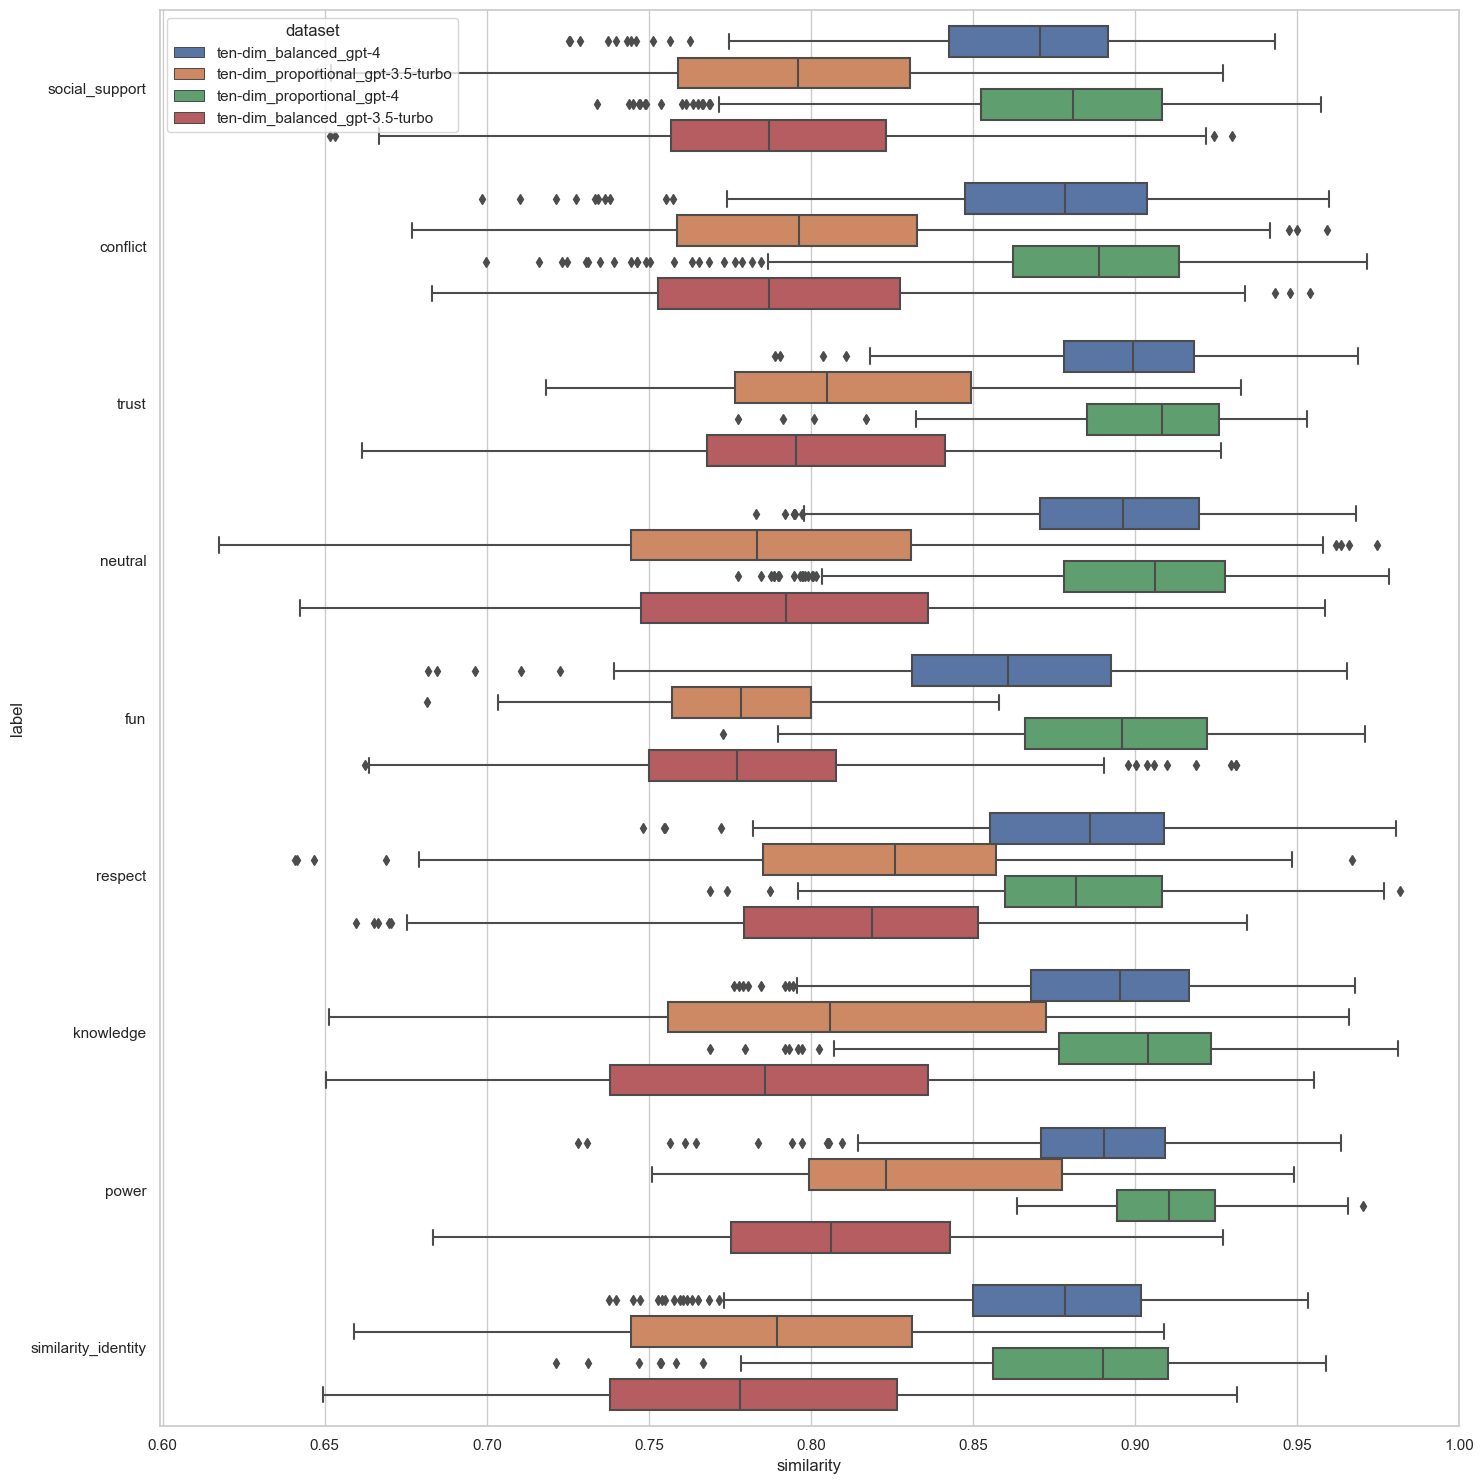

In [52]:
files = [file for file in os.listdir() if file.startswith('ten-dim')]
labels: List[str] = [
            "social_support",
            "conflict",
            "trust",
            "neutral",
            "fun",
            "respect",
            "knowledge",
            "power",
            "similarity_identity",
        ]

df = pd.DataFrame(columns=["label", "similarity", "dataset"])

for filename in files:
    with open(filename) as f:
        data = json.load(f)

    similarities_concatenated = {k: [] for k in labels}
    for label, dict_with_similarities in data.items():
        for text in dict_with_similarities:
            list_similarities = [x[0] for x in dict_with_similarities[text]]
            similarities_concatenated[label].extend(list_similarities)

    for label, similarities in similarities_concatenated.items():
        df = df.append(pd.DataFrame({"label": [label] * len(similarities), "similarity": similarities, "dataset": [filename.split('_augmented_similarity.json')[0]] * len(similarities)}))

# set figure size
plt.figure(figsize=(15, 15))

sns.boxplot(data=df, x="similarity", y="label", hue="dataset")

plt.tight_layout()
plt.show()

## Sentiment

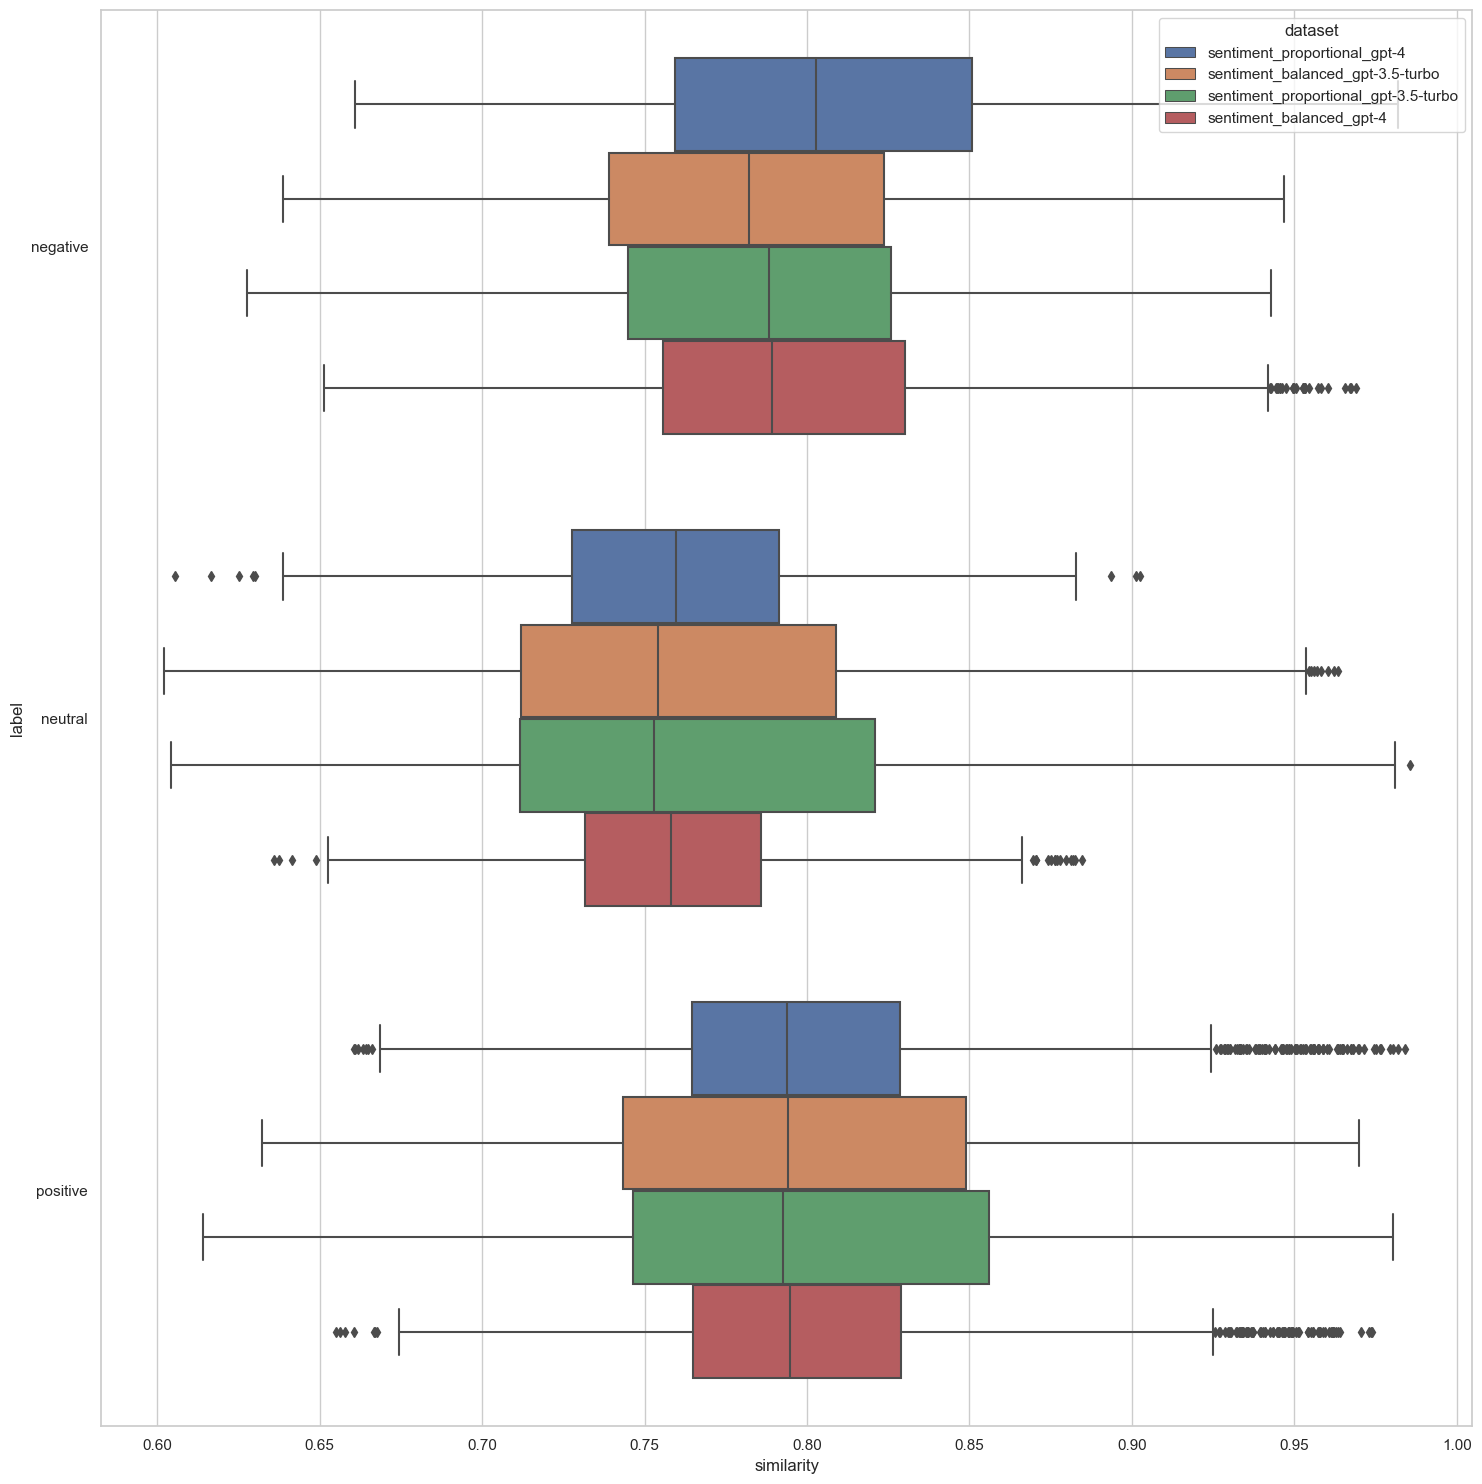

In [50]:
files = [file for file in os.listdir() if file.startswith('sentiment')]
labels: List[str] = [
            "negative",
            "neutral",
            "positive",
        ]

df = pd.DataFrame(columns=["label", "similarity", "dataset"])

for filename in files:
    with open(filename) as f:
        data = json.load(f)

    similarities_concatenated = {k: [] for k in labels}
    for label, dict_with_similarities in data.items():
        for text in dict_with_similarities:
            list_similarities = [x[0] for x in dict_with_similarities[text]]
            similarities_concatenated[label].extend(list_similarities)

    for label, similarities in similarities_concatenated.items():
        df = df.append(pd.DataFrame({"label": [label] * len(similarities), "similarity": similarities, "dataset": [filename.split('_augmented_similarity.json')[0]] * len(similarities)}))

# set figure size
plt.figure(figsize=(15, 15))

sns.boxplot(data=df, x="similarity", y="label", hue="dataset")

plt.tight_layout()
plt.show()

## Hate-speech

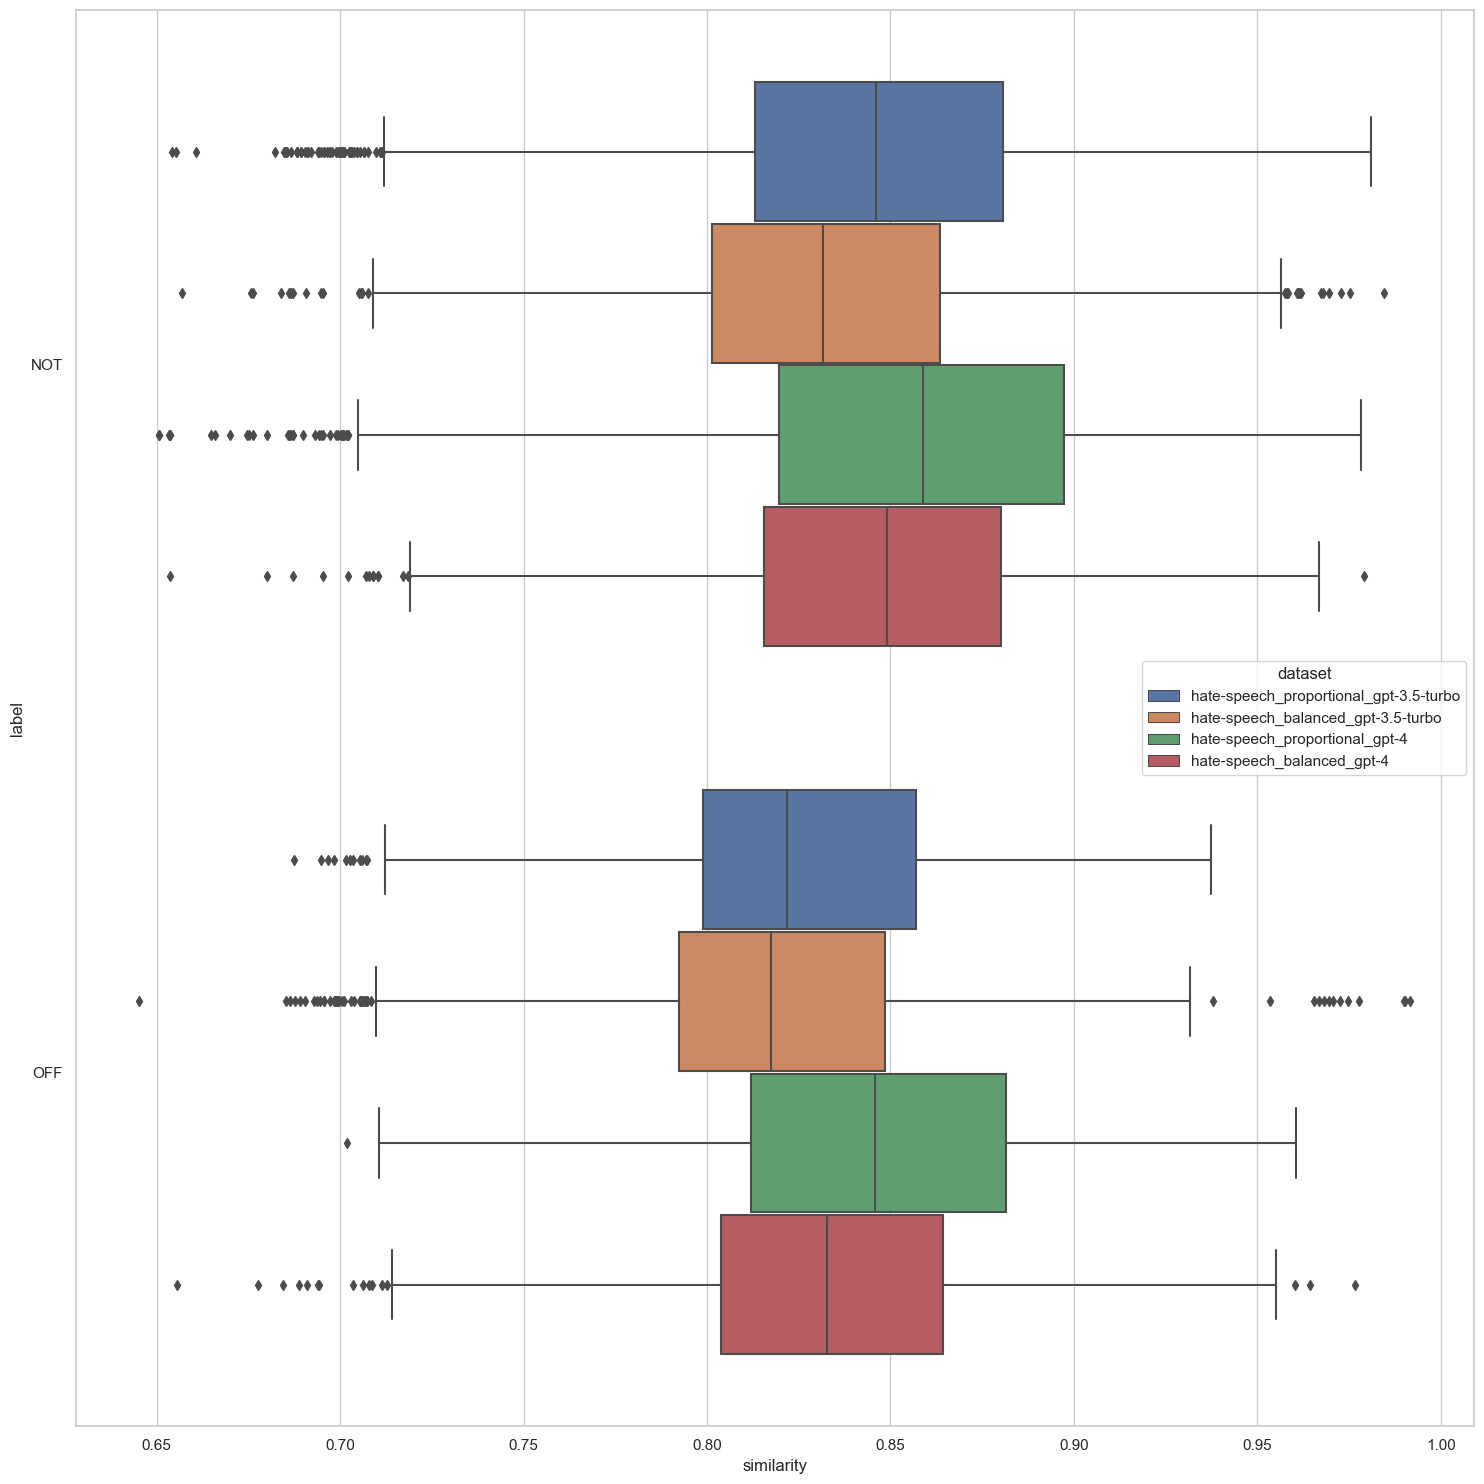

In [51]:
files = [file for file in os.listdir() if file.startswith('hate-speech')]
labels: List[str] = ["NOT", "OFF"]

df = pd.DataFrame(columns=["label", "similarity", "dataset"])

for filename in files:
    with open(filename) as f:
        data = json.load(f)

    similarities_concatenated = {k: [] for k in labels}
    for label, dict_with_similarities in data.items():
        for text in dict_with_similarities:
            list_similarities = [x[0] for x in dict_with_similarities[text]]
            similarities_concatenated[label].extend(list_similarities)

    for label, similarities in similarities_concatenated.items():
        df = df.append(pd.DataFrame({"label": [label] * len(similarities), "similarity": similarities, "dataset": [filename.split('_augmented_similarity.json')[0]] * len(similarities)}))

# set figure size
plt.figure(figsize=(15, 15))

sns.boxplot(data=df, x="similarity", y="label", hue="dataset")

plt.tight_layout()
plt.show()